# AMAYA ESHIA - 0110224102 - TUGAS MANDIRI 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
titanic_data = pd.read_csv('//content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 8/Data/tested.csv')

In [39]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [38]:
titanic_data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,0,3,0,27.0,0,0,8.0500,0
414,1,1,1,39.0,0,0,108.9000,1
415,0,3,0,38.5,0,0,7.2500,0
416,0,3,0,27.0,0,0,8.0500,0
417,0,3,0,27.0,1,1,22.3583,1


In [40]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [42]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [26]:
titanic_data = titanic_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)

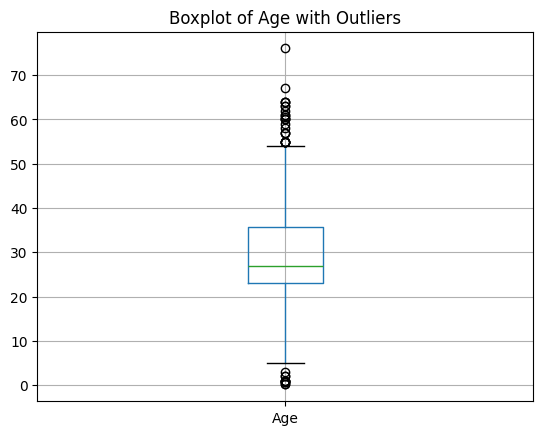

In [43]:
titanic_data.boxplot(column=['Age'])
plt.title("Boxplot of Age with Outliers")
plt.show()


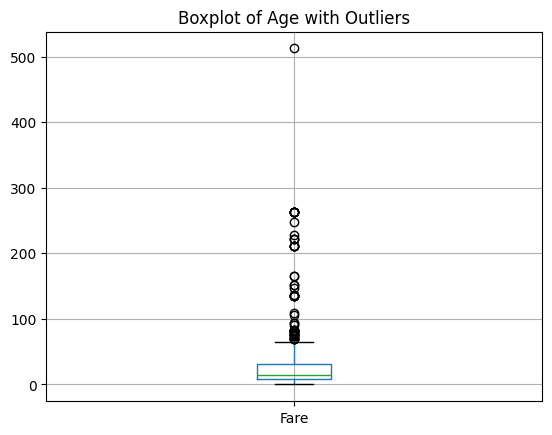

In [44]:
# Boxplot untuk kolom 'Fare' (Page 7)
titanic_data.boxplot(column=['Fare'])
plt.title("Boxplot of Age with Outliers")
plt.show()

In [27]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [45]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [46]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.464115
std,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [47]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [48]:
titanic_data['Sex'].value_counts()

,count
Sex,
0,266
1,152


In [49]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


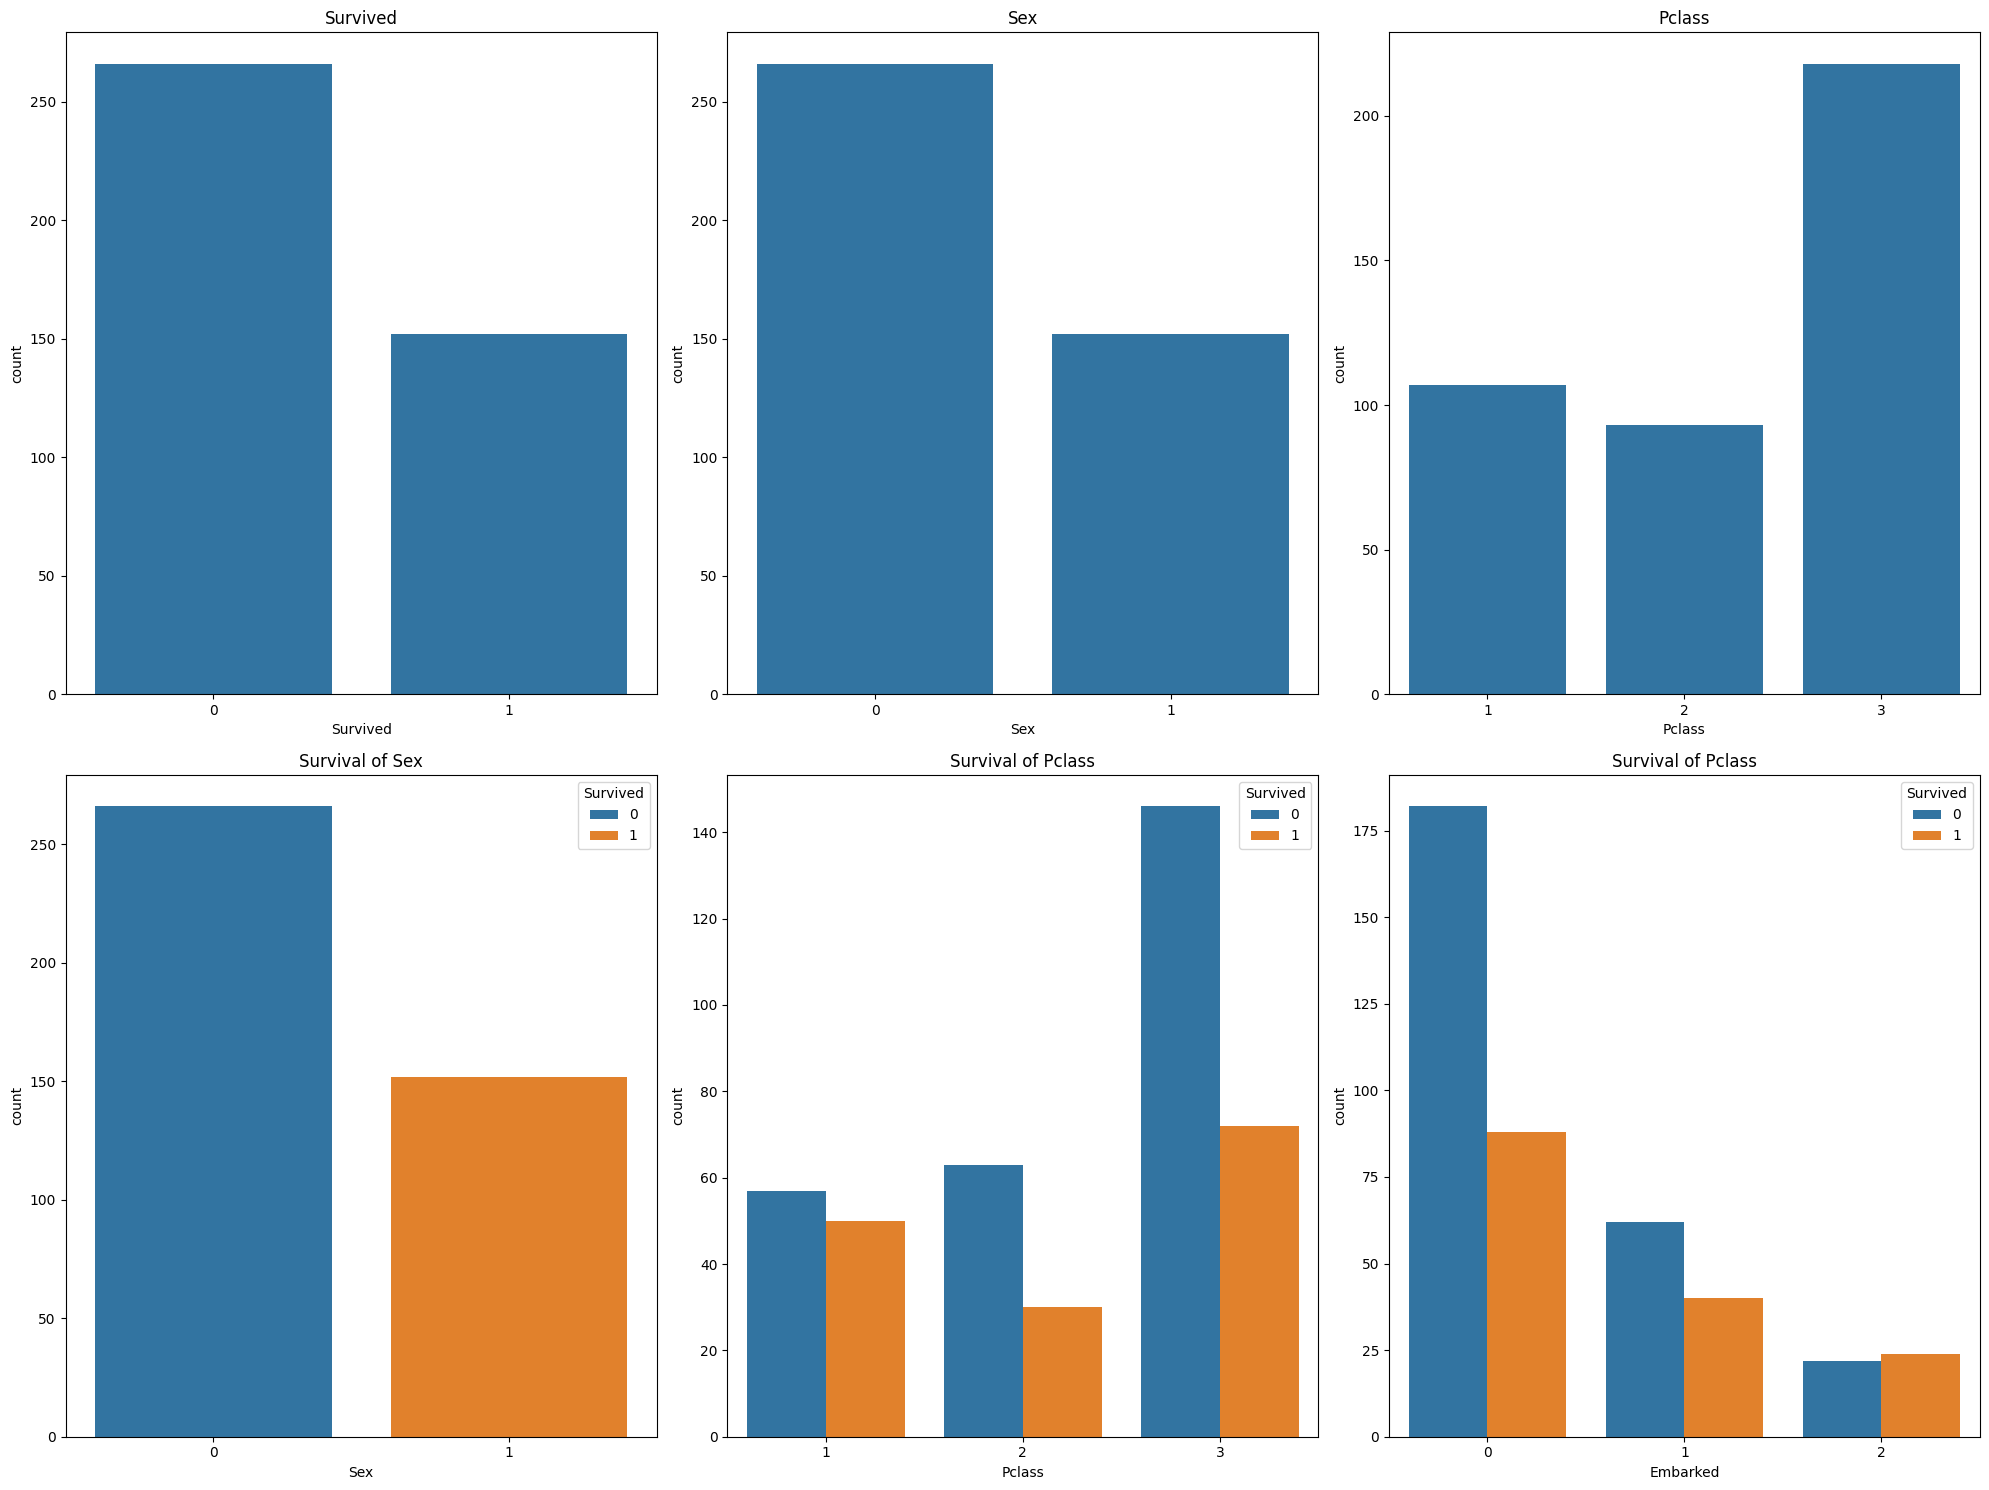

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axes = axes.flatten()

sns.countplot(x='Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x='Sex', data=titanic_data, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x='Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x='Sex', hue='Survived', data=titanic_data, ax=axes[3])
axes[3].set_title('Survival of Sex')

sns.countplot(x='Pclass', hue='Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Survival of Pclass')

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, ax=axes[5])
axes[5].set_title('Survival of Pclass')

plt.tight_layout()
plt.show()

In [28]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}
titanic_data.replace(replacements, inplace=True)

/tmp/ipython-input-1153169685.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace(replacements, inplace=True)


In [51]:
titanic_data.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


In [29]:
X = titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [53]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [54]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [34]:
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


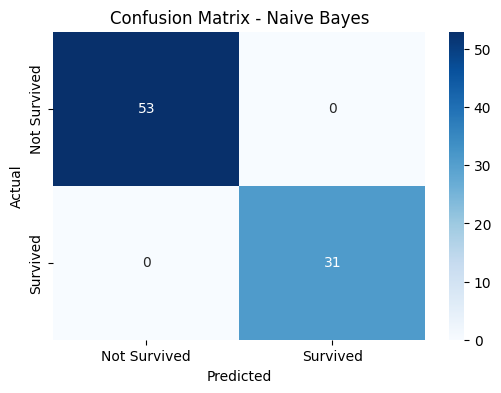

In [35]:
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [37]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Std Deviation: 0.0
